In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as sklin
from sklearn.feature_selection import RFECV
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

List of teams

In [2]:
teams = pd.concat( 
    map(pd.read_csv, ['C:/Users/blain/Desktop/DSC630/cfb/team-2005.csv',
                      'C:/Users/blain/Desktop/DSC630/cfb/team-2006.csv',
                      'C:/Users/blain/Desktop/DSC630/cfb/team-2007.csv',
                      'C:/Users/blain/Desktop/DSC630/cfb/team-2008.csv',
                      'C:/Users/blain/Desktop/DSC630/cfb/team-2009.csv',
                      'C:/Users/blain/Desktop/DSC630/cfb/team-2010.csv',
                      'C:/Users/blain/Desktop/DSC630/cfb/team-2011.csv',
                      'C:/Users/blain/Desktop/DSC630/cfb/team-2012.csv',
                      'C:/Users/blain/Desktop/DSC630/cfb/team-2013.csv']), ignore_index=True) 
teams

,Team Code,Name,Conference Code
0,5,Akron,875
1,8,Alabama,911
2,9,UAB,24312
3,28,Arizona State,905
4,29,Arizona,905
...,...,...,...
2188,1068,Elon,912
2189,1092,Gardner-Webb,826
2190,1320,Presbyterian,826
2191,2678,Arkansas-Pine Bluff,916


In [3]:
teams = teams.drop(['Conference Code'], axis=1)
teams

,Team Code,Name
0,5,Akron
1,8,Alabama
2,9,UAB
3,28,Arizona State
4,29,Arizona
...,...,...
2188,1068,Elon
2189,1092,Gardner-Webb
2190,1320,Presbyterian
2191,2678,Arkansas-Pine Bluff


In [4]:
teams = teams.drop_duplicates(subset=['Team Code'])
teams = teams.reset_index(drop=True)
teams

,Team Code,Name
0,5,Akron
1,8,Alabama
2,9,UAB
3,28,Arizona State
4,29,Arizona
...,...,...
248,254,Georgia State
249,346,Lamar
250,646,South Alabama
251,706,UTSA


In [5]:
teams['Team Code'].is_unique

True

Make list of teams and list of games

In [6]:
Bowls = pd.read_csv('C:/Users/blain/Desktop/DSC630/cfb/collegefootballbowl.csv')
Bowls = Bowls.loc[(Bowls['year'] >= 2005) & (Bowls['year'] <= 2013)]
Bowls

,id,year,date,day,winner_tie,winner_rank,winner_points,loser_tie,loser_rank,loser_points,attendance,mvp,sponsor,bowl_name
8,9,2013,12/30/2013,Mon,Oregon,10,30,Texas,NaN,7,65918.0,"QB Marcus Mariota (Oregon), SS Avery Patterson...",Valero Energy Corporation,Alamo Bowl
9,10,2012,12/29/2012,Sat,Texas,NaN,31,Oregon State,15,27,65277.0,"WR Marquise Goodwin (Texas), DL Alex Okafor (T...",Valero Energy Corporation,Alamo Bowl
10,11,2011,12/29/2011,Thu,Baylor,15,67,Washington,NaN,56,65256.0,"RB Terrance Ganaway (Baylor), LB Elliot Coffey...",Valero Energy Corporation,Alamo Bowl
11,12,2010,12/29/2010,Wed,Oklahoma State,16,36,Arizona,NaN,10,57593.0,"WR Justin Blackmon (Oklahoma State), DB Markel...",Valero Energy Corporation,Alamo Bowl
12,13,2009,1/2/2010,Sat,Texas Tech,NaN,41,Michigan State,NaN,31,64757.0,"QB Taylor Potts (Texas Tech), DB Jamar Wall (T...",Valero Energy Corporation,Alamo Bowl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,1504,2009,12/23/2009,Wed,Utah,23,37,California,NaN,27,32665.0,"QB Jordan Wynn (Utah), LB Stevenson Sylvester ...",San Diego County Credit Union,Poinsettia Bowl
1504,1505,2008,12/23/2008,Tue,Texas Christian,11,17,Boise State,9,16,34628.0,"QB Andy Dalton (Texas Christian), DB Stephen H...",San Diego County Credit Union,Poinsettia Bowl
1505,1506,2007,12/20/2007,Thu,Utah,NaN,35,Navy,NaN,32,39129.0,"QB Brian Johnson (Utah), DB Joe Dale (Utah)",San Diego County Credit Union,Poinsettia Bowl
1506,1507,2006,12/19/2006,Tue,Texas Christian,25,37,Northern Illinois,NaN,7,29709.0,"QB Jeff Ballard (Texas Christian), DL Tommy Bl...",San Diego County Credit Union,Poinsettia Bowl


In [7]:
Bowls_Short = Bowls[['year', 'winner_tie', 'winner_points', 'loser_tie', 'loser_points']]
Bowls_Short['point_differential'] = Bowls_Short.winner_points.astype(float) - Bowls_Short.loser_points.astype(float)
Bowls_Short

,year,winner_tie,winner_points,loser_tie,loser_points,point_differential
8,2013,Oregon,30,Texas,7,23.0
9,2012,Texas,31,Oregon State,27,4.0
10,2011,Baylor,67,Washington,56,11.0
11,2010,Oklahoma State,36,Arizona,10,26.0
12,2009,Texas Tech,41,Michigan State,31,10.0
...,...,...,...,...,...,...
1503,2009,Utah,37,California,27,10.0
1504,2008,Texas Christian,17,Boise State,16,1.0
1505,2007,Utah,35,Navy,32,3.0
1506,2006,Texas Christian,37,Northern Illinois,7,30.0


In [8]:
Bowl_Winners = Bowls[['year', 'winner_tie', 'winner_points', 'loser_points']]
Bowl_Winners['point_differential'] = Bowl_Winners.winner_points.astype(float) - Bowl_Winners.loser_points.astype(float)
Bowl_Winners['game_result'] = 1
Bowl_Winners = Bowl_Winners.rename(columns={"winner_tie": "team", "winner_points": "points_for", "loser_points": "points_against"})
Bowl_Winners

,year,team,points_for,points_against,point_differential,game_result
8,2013,Oregon,30,7,23.0,1
9,2012,Texas,31,27,4.0,1
10,2011,Baylor,67,56,11.0,1
11,2010,Oklahoma State,36,10,26.0,1
12,2009,Texas Tech,41,31,10.0,1
...,...,...,...,...,...,...
1503,2009,Utah,37,27,10.0,1
1504,2008,Texas Christian,17,16,1.0,1
1505,2007,Utah,35,32,3.0,1
1506,2006,Texas Christian,37,7,30.0,1


In [9]:
Bowl_Losers = Bowls[['year', 'loser_tie', 'loser_points', 'winner_points']]
Bowl_Losers['point_differential'] = Bowl_Losers.loser_points.astype(float) - Bowl_Losers.winner_points.astype(float)
Bowl_Losers['game_result'] = 0
Bowl_Losers = Bowl_Losers.rename(columns={"loser_tie": "team", "loser_points": "points_for", "winner_points": "points_against"})
Bowl_Losers

,year,team,points_for,points_against,point_differential,game_result
8,2013,Texas,7,30,-23.0,0
9,2012,Oregon State,27,31,-4.0,0
10,2011,Washington,56,67,-11.0,0
11,2010,Arizona,10,36,-26.0,0
12,2009,Michigan State,31,41,-10.0,0
...,...,...,...,...,...,...
1503,2009,California,27,37,-10.0,0
1504,2008,Boise State,16,17,-1.0,0
1505,2007,Navy,32,35,-3.0,0
1506,2006,Northern Illinois,7,37,-30.0,0


In [10]:
Bowl_Teams = pd.concat([Bowl_Winners, Bowl_Losers], axis=0)
Bowl_Teams = Bowl_Teams.reset_index(drop=True)
Bowl_Teams

,year,team,points_for,points_against,point_differential,game_result
0,2013,Oregon,30,7,23.0,1
1,2012,Texas,31,27,4.0,1
2,2011,Baylor,67,56,11.0,1
3,2010,Oklahoma State,36,10,26.0,1
4,2009,Texas Tech,41,31,10.0,1
...,...,...,...,...,...,...
593,2009,California,27,37,-10.0,0
594,2008,Boise State,16,17,-1.0,0
595,2007,Navy,32,35,-3.0,0
596,2006,Northern Illinois,7,37,-30.0,0


In [11]:
Bowl_Teams['team'].unique()

array(['Oregon', 'Texas', 'Baylor', 'Oklahoma State', 'Texas Tech',
       'Missouri', 'Penn State', 'Nebraska', 'Navy', 'Rice',
       'Brigham Young', 'Army', 'Air Force', 'Houston', 'California',
       'Utah', 'Kansas', 'East Carolina', 'Central Florida', 'Marshall',
       'Louisville', 'Rutgers', 'South Florida', 'Vanderbilt',
       'Mississippi', 'Southern Methodist', 'Pittsburgh', 'Connecticut',
       'Cincinnati', 'Kansas State', 'Michigan State', 'Oklahoma', 'Iowa',
       'Iowa State', 'Arizona State', 'South Carolina', 'Georgia',
       'Alabama', 'Michigan', 'Wisconsin', 'Texas A&M', 'Arkansas',
       'Louisiana State', 'Auburn', 'San Diego State', 'Utah State',
       'Ohio', 'Northern Illinois', 'Idaho', 'Maryland', 'Fresno State',
       'Miami (Florida)', 'Boston College', 'Boise State',
       'West Virginia', 'Ohio State', 'Northwestern', 'Florida',
       'Mississippi State', 'Florida State', 'Virginia Tech',
       'Arkansas State', 'Miami (Ohio)', 'Central Mich

BYU needs to become Brigham Young

UCF needs to become Central Florida

SMU needs to become Southern Methodist

LSU needs to become Louisiana State

Miami (Florida) needs to become Miami

USC needs to become Southern California

TCU needs to become Texas Christian

Louisiana-Lafayette needs to become Louisiana

Middle Tennessee needs to become Middle Tennessee State

Hawai'i needs to become Hawaii

Bowling Green needs to become Bowling Green State

UTEP needs to become Texas-El Paso

UNLV needs to become Nevada-Las Vegas

In [12]:
Bowl_Teams.loc[Bowl_Teams['team'] == 'Brigham Young', 'team'] = 'BYU'
Bowl_Teams.loc[Bowl_Teams['team'] == 'Central Florida', 'team'] = 'UCF'
Bowl_Teams.loc[Bowl_Teams['team'] == 'Southern Methodist', 'team'] = 'SMU'
Bowl_Teams.loc[Bowl_Teams['team'] == 'Louisiana State', 'team'] = 'LSU'
Bowl_Teams.loc[Bowl_Teams['team'] == 'Southern California', 'team'] = 'USC'
Bowl_Teams.loc[Bowl_Teams['team'] == 'Texas Christian', 'team'] = 'TCU'
Bowl_Teams.loc[Bowl_Teams['team'] == 'Louisiana', 'team'] = 'Louisiana-Lafayette'
Bowl_Teams.loc[Bowl_Teams['team'] == 'Middle Tennessee State', 'team'] = 'Middle Tennessee'
Bowl_Teams.loc[Bowl_Teams['team'] == 'Hawaii', 'team'] = 'Hawai\'i'
Bowl_Teams.loc[Bowl_Teams['team'] == 'Bowling Green State', 'team'] = 'Bowling Green'
Bowl_Teams.loc[Bowl_Teams['team'] == 'Texas-El Paso', 'team'] = 'UTEP'
Bowl_Teams.loc[Bowl_Teams['team'] == 'Nevada-Las Vegas', 'team'] = 'UNLV'

In [13]:
Bowls_Short.loc[Bowls_Short['winner_tie'] == 'Brigham Young', 'winner_tie'] = 'BYU'
Bowls_Short.loc[Bowls_Short['loser_tie'] == 'Brigham Young', 'loser_tie'] = 'BYU'
Bowls_Short.loc[Bowls_Short['winner_tie'] == 'Central Florida', 'winner_tie'] = 'UCF'
Bowls_Short.loc[Bowls_Short['loser_tie'] == 'Central Florida', 'loser_tie'] = 'UCF'
Bowls_Short.loc[Bowls_Short['winner_tie'] == 'Southern Methodist', 'winner_tie'] = 'SMU'
Bowls_Short.loc[Bowls_Short['loser_tie'] == 'Southern Methodist', 'loser_tie'] = 'SMU'
Bowls_Short.loc[Bowls_Short['winner_tie'] == 'Louisiana State', 'winner_tie'] = 'LSU'
Bowls_Short.loc[Bowls_Short['loser_tie'] == 'Louisiana State', 'loser_tie'] = 'LSU'
Bowls_Short.loc[Bowls_Short['winner_tie'] == 'Southern California', 'winner_tie'] = 'USC'
Bowls_Short.loc[Bowls_Short['loser_tie'] == 'Southern California', 'loser_tie'] = 'USC'
Bowls_Short.loc[Bowls_Short['winner_tie'] == 'Texas Christian', 'winner_tie'] = 'TCU'
Bowls_Short.loc[Bowls_Short['loser_tie'] == 'Texas Christian', 'loser_tie'] = 'TCU'
Bowls_Short.loc[Bowls_Short['winner_tie'] == 'Louisiana', 'winner_tie'] = 'Louisiana-Lafayette'
Bowls_Short.loc[Bowls_Short['loser_tie'] == 'Louisiana', 'loser_tie'] = 'Louisiana-Lafayette'
Bowls_Short.loc[Bowls_Short['winner_tie'] == 'Middle Tennessee State', 'winner_tie'] = 'Middle Tennessee'
Bowls_Short.loc[Bowls_Short['loser_tie'] == 'Middle Tennessee State', 'loser_tie'] = 'Middle Tennessee'
Bowls_Short.loc[Bowls_Short['winner_tie'] == 'Hawaii', 'winner_tie'] = 'Hawai\'i'
Bowls_Short.loc[Bowls_Short['loser_tie'] == 'Hawaii', 'loser_tie'] = 'Hawai\'i'
Bowls_Short.loc[Bowls_Short['winner_tie'] == 'Bowling Green State', 'winner_tie'] = 'Bowling Green'
Bowls_Short.loc[Bowls_Short['loser_tie'] == 'Bowling Green State', 'loser_tie'] = 'Bowling Green'
Bowls_Short.loc[Bowls_Short['winner_tie'] == 'Texas-El Paso', 'winner_tie'] = 'UTEP'
Bowls_Short.loc[Bowls_Short['loser_tie'] == 'Texas-El Paso', 'loser_tie'] = 'UTEP'
Bowls_Short.loc[Bowls_Short['winner_tie'] == 'Nevada-Las Vegas', 'winner_tie'] = 'UNLV'
Bowls_Short.loc[Bowls_Short['loser_tie'] == 'Nevada-Las Vegas', 'loser_tie'] = 'UNLV'

In [14]:
Bowl_Teams

,year,team,points_for,points_against,point_differential,game_result
0,2013,Oregon,30,7,23.0,1
1,2012,Texas,31,27,4.0,1
2,2011,Baylor,67,56,11.0,1
3,2010,Oklahoma State,36,10,26.0,1
4,2009,Texas Tech,41,31,10.0,1
...,...,...,...,...,...,...
593,2009,California,27,37,-10.0,0
594,2008,Boise State,16,17,-1.0,0
595,2007,Navy,32,35,-3.0,0
596,2006,Northern Illinois,7,37,-30.0,0


In [15]:
Bowls_Short

,year,winner_tie,winner_points,loser_tie,loser_points,point_differential
8,2013,Oregon,30,Texas,7,23.0
9,2012,Texas,31,Oregon State,27,4.0
10,2011,Baylor,67,Washington,56,11.0
11,2010,Oklahoma State,36,Arizona,10,26.0
12,2009,Texas Tech,41,Michigan State,31,10.0
...,...,...,...,...,...,...
1503,2009,Utah,37,California,27,10.0
1504,2008,TCU,17,Boise State,16,1.0
1505,2007,Utah,35,Navy,32,3.0
1506,2006,TCU,37,Northern Illinois,7,30.0


In [16]:
Bowl_Teams = pd.merge(Bowl_Teams, teams, left_on='team', right_on='Name')
Bowl_Teams = Bowl_Teams.drop(['Name'], axis=1)
Bowl_Teams = Bowl_Teams.rename(columns={"Team Code":"team_code"})
Bowl_Teams

,year,team,points_for,points_against,point_differential,game_result,team_code
0,2013,Oregon,30,7,23.0,1,529
1,2012,Oregon,35,17,18.0,1,529
2,2011,Oregon,45,38,7.0,1,529
3,2007,Oregon,56,21,35.0,1,529
4,2008,Oregon,42,31,11.0,1,529
...,...,...,...,...,...,...,...
593,2013,Tulane,21,24,-3.0,0,718
594,2013,Duke,48,52,-4.0,0,193
595,2012,Duke,34,48,-14.0,0,193
596,2012,Western Kentucky,21,24,-3.0,0,772


In [17]:
Bowls_Short = pd.merge(Bowls_Short, teams, left_on='winner_tie', right_on='Name')
Bowls_Short = Bowls_Short.drop(['Name'], axis=1)
Bowls_Short = Bowls_Short.rename(columns={"Team Code":"winner_code"})
Bowls_Short = pd.merge(Bowls_Short, teams, left_on='loser_tie', right_on='Name')
Bowls_Short = Bowls_Short.drop(['Name'], axis=1)
Bowls_Short = Bowls_Short.rename(columns={"Team Code":"loser_code"})
Bowls_Short

,year,winner_tie,winner_points,loser_tie,loser_points,point_differential,winner_code,loser_code
0,2013,Oregon,30,Texas,7,23.0,529,703
1,2009,Alabama,37,Texas,21,16.0,8,703
2,2012,Oregon,35,Kansas State,17,18.0,529,327
3,2006,Rutgers,37,Kansas State,10,27.0,587,327
4,2011,Arkansas,29,Kansas State,16,13.0,31,327
...,...,...,...,...,...,...,...,...
294,2013,Louisiana-Lafayette,24,Tulane,21,3.0,671,718
295,2008,Florida Atlantic,24,Central Michigan,21,3.0,229,129
296,2007,Purdue,51,Central Michigan,48,3.0,559,129
297,2009,UCLA,30,Temple,21,9.0,110,690


Get game data

In [18]:
Games_2005 = pd.read_csv('C:/Users/blain/Desktop/DSC630/cfb/team-game-statistics-2005.csv')
Games_2006 = pd.read_csv('C:/Users/blain/Desktop/DSC630/cfb/team-game-statistics-2006.csv')
Games_2007 = pd.read_csv('C:/Users/blain/Desktop/DSC630/cfb/team-game-statistics-2007.csv')
Games_2008 = pd.read_csv('C:/Users/blain/Desktop/DSC630/cfb/team-game-statistics-2008.csv')
Games_2009 = pd.read_csv('C:/Users/blain/Desktop/DSC630/cfb/team-game-statistics-2009.csv')
Games_2010 = pd.read_csv('C:/Users/blain/Desktop/DSC630/cfb/team-game-statistics-2010.csv')
Games_2011 = pd.read_csv('C:/Users/blain/Desktop/DSC630/cfb/team-game-statistics-2011.csv')
Games_2012 = pd.read_csv('C:/Users/blain/Desktop/DSC630/cfb/team-game-statistics-2012.csv')
Games_2013 = pd.read_csv('C:/Users/blain/Desktop/DSC630/cfb/team-game-statistics-2013.csv')
Games_2005

,Team Code,Game Code,Rush Att,Rush Yard,Rush TD,Pass Att,Pass Comp,Pass Yard,Pass TD,Pass Int,...,Time Of Possession,Penalty,Penalty Yard,Third Down Att,Third Down Conv,Fourth Down Att,Fourth Down Conv,Red Zone Att,Red Zone TD,Red Zone Field Goal
0,5,5055920050910,21,23,0,46,26,362,3,0,...,1433,5,42,13,2,3,0,2,1,1
1,5,5041920050917,39,102,0,43,23,319,2,3,...,2154,8,49,14,7,2,0,5,2,0
2,5,503000520050924,32,119,1,39,20,406,5,0,...,1764,5,36,15,6,0,0,4,3,1
3,5,129000520051001,24,90,0,57,30,270,2,3,...,1908,5,50,20,7,1,1,2,0,1
4,5,5008620051008,36,79,1,33,12,145,0,0,...,1657,9,89,18,3,3,1,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,772,772003720050924,34,155,2,22,12,187,0,2,...,1666,4,35,13,5,1,0,2,1,0
1432,772,772023120051119,44,222,2,14,11,125,3,0,...,1859,4,32,12,7,2,0,5,4,0
1433,786,786038820050901,37,155,1,35,18,204,2,1,...,1818,4,18,13,6,0,0,4,3,0
1434,817,817054520050924,31,109,0,25,8,43,0,1,...,1728,9,89,13,1,3,1,1,0,0


In [19]:
grouped_2005 = Games_2005.groupby('Team Code')
Games_2005 = Games_2005[grouped_2005.cumcount(ascending=False) > 0]

grouped_2006 = Games_2006.groupby('Team Code')
Games_2006 = Games_2006[grouped_2006.cumcount(ascending=False) > 0]

grouped_2007 = Games_2007.groupby('Team Code')
Games_2007 = Games_2007[grouped_2007.cumcount(ascending=False) > 0]

grouped_2008 = Games_2008.groupby('Team Code')
Games_2008 = Games_2008[grouped_2008.cumcount(ascending=False) > 0]

grouped_2009 = Games_2009.groupby('Team Code')
Games_2009 = Games_2009[grouped_2009.cumcount(ascending=False) > 0]

grouped_2010 = Games_2010.groupby('Team Code')
Games_2010 = Games_2010[grouped_2010.cumcount(ascending=False) > 0]

grouped_2011 = Games_2011.groupby('Team Code')
Games_2011 = Games_2011[grouped_2011.cumcount(ascending=False) > 0]

grouped_2012 = Games_2012.groupby('Team Code')
Games_2012 = Games_2012[grouped_2012.cumcount(ascending=False) > 0]

grouped_2013 = Games_2013.groupby('Team Code')
Games_2013 = Games_2013[grouped_2013.cumcount(ascending=False) > 0]

Games_2005

,Team Code,Game Code,Rush Att,Rush Yard,Rush TD,Pass Att,Pass Comp,Pass Yard,Pass TD,Pass Int,...,Time Of Possession,Penalty,Penalty Yard,Third Down Att,Third Down Conv,Fourth Down Att,Fourth Down Conv,Red Zone Att,Red Zone TD,Red Zone Field Goal
0,5,5055920050910,21,23,0,46,26,362,3,0,...,1433,5,42,13,2,3,0,2,1,1
1,5,5041920050917,39,102,0,43,23,319,2,3,...,2154,8,49,14,7,2,0,5,2,0
2,5,503000520050924,32,119,1,39,20,406,5,0,...,1764,5,36,15,6,0,0,4,3,1
3,5,129000520051001,24,90,0,57,30,270,2,3,...,1908,5,50,20,7,1,1,2,0,1
4,5,5008620051008,36,79,1,33,12,145,0,0,...,1657,9,89,18,3,3,1,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,228,228065120050910,26,31,0,20,9,54,0,1,...,1446,8,74,13,0,1,0,1,0,1
1409,508,508049820050901,40,120,1,23,15,229,3,3,...,1665,10,96,10,1,1,0,4,2,0
1411,550,550052820050903,34,126,1,33,15,174,1,2,...,1938,1,10,15,4,2,1,2,2,0
1414,624,624028820050910,22,136,1,39,18,179,0,1,...,1548,7,38,12,2,1,1,3,1,1


In [20]:
Games_2005 = Games_2005.groupby('Team Code').mean().reset_index()
Games_2006 = Games_2006.groupby('Team Code').mean().reset_index()
Games_2007 = Games_2007.groupby('Team Code').mean().reset_index()
Games_2008 = Games_2008.groupby('Team Code').mean().reset_index()
Games_2009 = Games_2009.groupby('Team Code').mean().reset_index()
Games_2010 = Games_2010.groupby('Team Code').mean().reset_index()
Games_2011 = Games_2011.groupby('Team Code').mean().reset_index()
Games_2012 = Games_2012.groupby('Team Code').mean().reset_index()
Games_2013 = Games_2013.groupby('Team Code').mean().reset_index()
Games_2005

,Team Code,Game Code,Rush Att,Rush Yard,Rush TD,Pass Att,Pass Comp,Pass Yard,Pass TD,Pass Int,...,Time Of Possession,Penalty,Penalty Yard,Third Down Att,Third Down Conv,Fourth Down Att,Fourth Down Conv,Red Zone Att,Red Zone TD,Red Zone Field Goal
0,5,1.868511e+14,33.250000,112.333333,1.000000,40.166667,20.833333,262.166667,1.666667,1.000000,...,1802.750000,7.166667,62.916667,16.250000,5.416667,2.166667,0.916667,3.666667,1.833333,0.833333
1,8,2.882873e+14,38.090909,142.272727,1.090909,29.090909,17.272727,211.090909,1.363636,0.363636,...,1942.909091,6.363636,47.818182,15.000000,5.545455,1.000000,0.272727,3.727273,1.636364,1.181818
2,9,2.389295e+14,33.300000,143.800000,1.200000,34.600000,22.200000,293.500000,2.300000,0.900000,...,1814.400000,7.200000,60.900000,12.900000,5.100000,1.300000,0.700000,3.600000,2.300000,0.900000
3,27,2.703282e+13,33.000000,133.000000,0.000000,35.000000,22.000000,178.000000,1.000000,0.000000,...,1905.000000,7.000000,71.000000,16.000000,6.000000,1.000000,0.000000,4.000000,1.000000,0.000000
4,28,3.315660e+14,36.545455,139.636364,1.454545,41.636364,26.272727,364.909091,3.090909,1.000000,...,1782.000000,9.363636,80.000000,14.818182,7.181818,1.545455,0.818182,4.636364,3.272727,0.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,768,7.972461e+14,51.090909,262.454545,2.727273,16.272727,10.090909,116.181818,1.000000,0.636364,...,1829.545455,6.636364,56.636364,14.545455,6.545455,1.090909,0.636364,4.454545,3.090909,0.727273
122,772,7.720037e+14,34.000000,155.000000,2.000000,22.000000,12.000000,187.000000,0.000000,2.000000,...,1666.000000,4.000000,35.000000,13.000000,5.000000,1.000000,0.000000,2.000000,1.000000,0.000000
123,774,5.122629e+14,39.500000,150.100000,1.000000,34.300000,21.700000,252.700000,2.900000,0.900000,...,1760.700000,7.800000,65.100000,14.700000,5.800000,1.400000,0.900000,4.100000,2.700000,0.900000
124,796,5.943941e+14,44.166667,161.583333,2.500000,25.833333,15.416667,222.333333,1.666667,0.750000,...,1898.916667,5.333333,46.416667,14.833333,6.916667,1.500000,0.833333,4.666667,3.416667,0.750000


In [21]:
Games_2005['Year'] = 2005
Games_2006['Year'] = 2006
Games_2007['Year'] = 2007
Games_2008['Year'] = 2008
Games_2009['Year'] = 2009
Games_2010['Year'] = 2010
Games_2011['Year'] = 2011
Games_2012['Year'] = 2012
Games_2013['Year'] = 2013
Games = pd.concat([Games_2005, Games_2006, Games_2007, Games_2008, Games_2009, Games_2010, Games_2011, Games_2012, Games_2013], axis=0)
Games = Games.reset_index(drop=True)
Games

,Team Code,Game Code,Rush Att,Rush Yard,Rush TD,Pass Att,Pass Comp,Pass Yard,Pass TD,Pass Int,...,Penalty,Penalty Yard,Third Down Att,Third Down Conv,Fourth Down Att,Fourth Down Conv,Red Zone Att,Red Zone TD,Red Zone Field Goal,Year
0,5,1.868511e+14,33.250000,112.333333,1.000000,40.166667,20.833333,262.166667,1.666667,1.000000,...,7.166667,62.916667,16.250000,5.416667,2.166667,0.916667,3.666667,1.833333,0.833333,2005
1,8,2.882873e+14,38.090909,142.272727,1.090909,29.090909,17.272727,211.090909,1.363636,0.363636,...,6.363636,47.818182,15.000000,5.545455,1.000000,0.272727,3.727273,1.636364,1.181818,2005
2,9,2.389295e+14,33.300000,143.800000,1.200000,34.600000,22.200000,293.500000,2.300000,0.900000,...,7.200000,60.900000,12.900000,5.100000,1.300000,0.700000,3.600000,2.300000,0.900000,2005
3,27,2.703282e+13,33.000000,133.000000,0.000000,35.000000,22.000000,178.000000,1.000000,0.000000,...,7.000000,71.000000,16.000000,6.000000,1.000000,0.000000,4.000000,1.000000,0.000000,2005
4,28,3.315660e+14,36.545455,139.636364,1.454545,41.636364,26.272727,364.909091,3.090909,1.000000,...,9.363636,80.000000,14.818182,7.181818,1.545455,0.818182,4.636364,3.272727,0.727273,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,771,7.710428e+14,30.000000,68.000000,0.000000,23.000000,11.000000,162.000000,2.000000,0.000000,...,5.000000,20.000000,14.000000,4.000000,1.000000,1.000000,2.000000,2.000000,0.000000,2013
1236,772,6.841577e+14,40.000000,201.000000,2.636364,33.636364,22.272727,262.272727,1.090909,1.454545,...,6.090909,44.909091,13.363636,6.181818,2.090909,1.000000,5.454545,3.272727,1.181818,2013
1237,774,5.200584e+14,32.181818,118.272727,0.727273,36.909091,18.181818,215.363636,1.090909,1.636364,...,7.090909,62.909091,15.818182,4.818182,1.818182,0.818182,3.000000,1.272727,1.181818,2013
1238,796,5.885597e+14,42.833333,283.000000,2.916667,27.416667,16.750000,203.750000,1.666667,1.000000,...,4.416667,39.083333,13.583333,5.666667,1.333333,0.833333,4.500000,3.083333,0.916667,2013


In [22]:
Final_Data_Ind = pd.merge(Bowl_Teams, Games, left_on=['year','team_code'], right_on=['Year','Team Code'])
Final_Data_Ind = Final_Data_Ind.drop(['Game Code','Year', 'Team Code'], axis=1)
Final_Data_Ind

,year,team,points_for,points_against,point_differential,game_result,team_code,Rush Att,Rush Yard,Rush TD,...,Time Of Possession,Penalty,Penalty Yard,Third Down Att,Third Down Conv,Fourth Down Att,Fourth Down Conv,Red Zone Att,Red Zone TD,Red Zone Field Goal
0,2013,Oregon,30,7,23.0,1,529,43.833333,278.333333,3.500000,...,1519.500000,7.916667,68.750000,12.333333,5.416667,2.583333,1.250000,5.833333,4.000000,0.583333
1,2012,Oregon,35,17,18.0,1,529,53.333333,323.250000,3.916667,...,1690.583333,8.166667,74.250000,15.166667,7.166667,2.250000,1.583333,5.833333,4.833333,0.416667
2,2011,Oregon,45,38,7.0,1,529,45.307692,295.692308,3.000000,...,1503.076923,7.230769,65.692308,13.000000,5.846154,2.307692,1.000000,4.846154,3.692308,0.461538
3,2007,Oregon,56,21,35.0,1,529,47.666667,243.833333,2.583333,...,1734.166667,5.500000,48.083333,16.166667,6.750000,1.166667,0.500000,4.500000,2.833333,0.916667
4,2008,Oregon,42,31,11.0,1,529,45.416667,277.833333,3.500000,...,1519.083333,7.416667,64.333333,14.083333,5.500000,1.416667,0.583333,5.250000,3.250000,1.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,2013,Tulane,21,24,-3.0,0,718,36.083333,128.083333,1.000000,...,1834.583333,6.833333,60.833333,15.166667,5.500000,0.833333,0.416667,3.166667,1.916667,0.666667
594,2013,Duke,48,52,-4.0,0,193,39.000000,173.692308,1.923077,...,1716.230769,4.692308,41.538462,14.230769,5.384615,1.461538,1.000000,4.076923,2.846154,0.615385
595,2012,Duke,34,48,-14.0,0,193,33.333333,119.000000,1.416667,...,1855.000000,5.916667,49.083333,15.500000,5.166667,2.083333,1.166667,4.000000,2.333333,1.083333
596,2012,Western Kentucky,21,24,-3.0,0,772,39.500000,186.583333,1.583333,...,1963.750000,6.083333,58.750000,12.750000,6.083333,1.416667,0.583333,4.000000,2.583333,0.666667


In [23]:
Final_Data_Game = pd.merge(Bowls_Short, Games, left_on=['year', 'winner_code'], right_on=['Year', 'Team Code'])
Final_Data_Game = Final_Data_Game.drop(['Game Code', 'Year', 'Team Code'], axis=1)
Final_Data_Game = Final_Data_Game.rename(columns={'Rush Att':'Winner Rush Att', 'Rush Yard':'Winner Rush Yard', 'Rush TD':'Winner Rush TD', 'Pass Att':'Winner Pass Att', 'Pass Comp':'Winner Pass Comp', 'Pass Yard':'Winner Pass Yard', 'Pass TD':'Winner Pass TD', 'Pass Int':'Winner Pass Int', 'Pass Conv':'Winner Pass Conv', 'Kickoff Ret':'Winner Kickoff Ret', 'Kickoff Ret Yard':'Winner Kickoff Ret Yard', 'Kickoff Ret TD':'Winner Kickoff Ret TD', 'Punt Ret':'Winner Punt Ret', 'Punt Ret Yard':'Winner Punt Ret Yard', 'Punt Ret TD':'Winner Punt Ret TD', 'Fum Ret':'Winner Fum Ret', 'Fum Ret Yard':'Winner Fum Ret Yard', 'Fum Ret TD':'Winner Fum Ret TD', 'Int Ret':'Winner Int Ret', 'Int Ret Yard':'Winner Int Ret Yard', 'Int Ret TD':'Winner Int Ret TD', 'Misc Ret':'Winner Misc Ret', 'Misc Ret Yard':'Winner Misc Ret Yard', 'Misc Ret TD':'Winner Misc Ret TD', 'Field Goal Att':'Winner Field Goal Att', 'Field Goal Made':'Winner Field Goal Made', 'Off XP Kick Att':'Winner Off XP Kick Att', 'Off XP Kick Made':'Winner Off XP Kick Made', 'Off 2XP Att':'Winner Off 2XP Att', 'Off 2XP Made':'Winner Off 2XP Made', 'Def 2XP Att':'Winner Def 2XP Att', 'Def 2XP Made':'Winner Def 2XP Made', 'Safety':'Winner Safety', 'Points':'Winner Points', 'Punt':'Winner Punt', 'Punt Yard':'Winner Punt Yard', 'Kickoff':'Winner Kickoff', 'Kickoff Yard':'Winner Kickoff Yard', 'Kickoff Touchback':'Winner Kickoff Touchback', 'Kickoff Out-Of-Bounds':'Winner Kickoff Out-Of-Bounds', 'Kickoff Onside':'Winner Kickoff Onside', 'Fumble':'Winner Fumble', 'Fumble Lost':'Winner Fumble Lost', 'Tackle Solo':'Winner Tackle Solo', 'Tackle Assist':'Winner Tackle Assist', 'Tackle For Loss':'Winner Tackle For Loss', 'Tackle For Loss Yard':'Winner Tackle For Loss Yard', 'Sack':'Winner Sack', 'Sack Yard':'Winner Sack Yard', 'QB Hurry':'Winner QB Hurry', 'Fumble Forced':'Winner Fumble Forced', 'Pass Broken Up':'Winner Pass Broken Up', 'Kick/Punt Blocked':'Winner Kick/Punt Blocked', '1st Down Rush':'Winner 1st Down Rush', '1st Down Pass':'Winner 1st Down Pass', '1st Down Penalty':'Winner 1st Down Penalty', 'Time Of Possession':'Winner Time Of Possession', 'Penalty':'Winner Penalty', 'Penalty Yard':'Winner Penalty Yard', 'Third Down Att':'Winner Third Down Att', 'Third Down Conv':'Winner Third Down Conv', 'Fourth Down Att':'Winner Fourth Down Att', 'Fourth Down Conv':'Winner Fourth Down Conv', 'Red Zone Att':'Winner Red Zone Att', 'Red Zone TD':'Winner Red Zone TD', 'Red Zone Field Goal':'Winner Red Zone Field Goal'})
Final_Data_Game = pd.merge(Final_Data_Game, Games, left_on=['year','loser_code'], right_on=['Year', 'Team Code'])
Final_Data_Game = Final_Data_Game.drop(['Game Code', 'Year', 'Team Code'], axis=1)
Final_Data_Game = Final_Data_Game.rename(columns={'Rush Att':'Loser Rush Att', 'Rush Yard':'Loser Rush Yard', 'Rush TD':'Loser Rush TD', 'Pass Att':'Loser Pass Att', 'Pass Comp':'Loser Pass Comp', 'Pass Yard':'Loser Pass Yard', 'Pass TD':'Loser Pass TD', 'Pass Int':'Loser Pass Int', 'Pass Conv':'Loser Pass Conv', 'Kickoff Ret':'Loser Kickoff Ret', 'Kickoff Ret Yard':'Loser Kickoff Ret Yard', 'Kickoff Ret TD':'Loser Kickoff Ret TD', 'Punt Ret':'Loser Punt Ret', 'Punt Ret Yard':'Loser Punt Ret Yard', 'Punt Ret TD':'Loser Punt Ret TD', 'Fum Ret':'Loser Fum Ret', 'Fum Ret Yard':'Loser Fum Ret Yard', 'Fum Ret TD':'Loser Fum Ret TD', 'Int Ret':'Loser Int Ret', 'Int Ret Yard':'Loser Int Ret Yard', 'Int Ret TD':'Loser Int Ret TD', 'Misc Ret':'Loser Misc Ret', 'Misc Ret Yard':'Loser Misc Ret Yard', 'Misc Ret TD':'Loser Misc Ret TD', 'Field Goal Att':'Loser Field Goal Att', 'Field Goal Made':'Loser Field Goal Made', 'Off XP Kick Att':'Loser Off XP Kick Att', 'Off XP Kick Made':'Loser Off XP Kick Made', 'Off 2XP Att':'Loser Off 2XP Att', 'Off 2XP Made':'Loser Off 2XP Made', 'Def 2XP Att':'Loser Def 2XP Att', 'Def 2XP Made':'Loser Def 2XP Made', 'Safety':'Loser Safety', 'Points':'Loser Points', 'Punt':'Loser Punt', 'Punt Yard':'Loser Punt Yard', 'Kickoff':'Loser Kickoff', 'Kickoff Yard':'Loser Kickoff Yard', 'Kickoff Touchback':'Loser Kickoff Touchback', 'Kickoff Out-Of-Bounds':'Loser Kickoff Out-Of-Bounds', 'Kickoff Onside':'Loser Kickoff Onside', 'Fumble':'Loser Fumble', 'Fumble Lost':'Loser Fumble Lost', 'Tackle Solo':'Loser Tackle Solo', 'Tackle Assist':'Loser Tackle Assist', 'Tackle For Loss':'Loser Tackle For Loss', 'Tackle For Loss Yard':'Loser Tackle For Loss Yard', 'Sack':'Loser Sack', 'Sack Yard':'Loser Sack Yard', 'QB Hurry':'Loser QB Hurry', 'Fumble Forced':'Loser Fumble Forced', 'Pass Broken Up':'Loser Pass Broken Up', 'Kick/Punt Blocked':'Loser Kick/Punt Blocked', '1st Down Rush':'Loser 1st Down Rush', '1st Down Pass':'Loser 1st Down Pass', '1st Down Penalty':'Loser 1st Down Penalty', 'Time Of Possession':'Loser Time Of Possession', 'Penalty':'Loser Penalty', 'Penalty Yard':'Loser Penalty Yard', 'Third Down Att':'Loser Third Down Att', 'Third Down Conv':'Loser Third Down Conv', 'Fourth Down Att':'Loser Fourth Down Att', 'Fourth Down Conv':'Loser Fourth Down Conv', 'Red Zone Att':'Loser Red Zone Att', 'Red Zone TD':'Loser Red Zone TD', 'Red Zone Field Goal':'Loser Red Zone Field Goal'})
Final_Data_Game

,year,winner_tie,winner_points,loser_tie,loser_points,point_differential,winner_code,loser_code,Winner Rush Att,Winner Rush Yard,...,Loser Time Of Possession,Loser Penalty,Loser Penalty Yard,Loser Third Down Att,Loser Third Down Conv,Loser Fourth Down Att,Loser Fourth Down Conv,Loser Red Zone Att,Loser Red Zone TD,Loser Red Zone Field Goal
0,2013,Oregon,30,Texas,7,23.0,529,703,43.833333,278.333333,...,1809.750000,5.250000,46.833333,16.916667,7.000000,1.750000,0.750000,3.333333,1.916667,1.083333
1,2009,Alabama,37,Texas,21,16.0,8,703,42.307692,215.846154,...,1853.307692,6.615385,56.923077,14.846154,6.846154,1.076923,0.615385,4.384615,3.076923,1.000000
2,2012,Oregon,35,Kansas State,17,18.0,529,327,53.333333,323.250000,...,1917.333333,3.500000,28.833333,12.083333,6.083333,0.583333,0.416667,5.666667,3.583333,1.333333
3,2006,Rutgers,37,Kansas State,10,27.0,587,327,38.250000,177.583333,...,1669.916667,6.666667,56.083333,13.833333,5.000000,1.666667,0.750000,2.666667,1.000000,0.750000
4,2011,Arkansas,29,Kansas State,16,13.0,31,327,31.833333,138.083333,...,2035.833333,4.666667,35.583333,15.000000,6.500000,0.750000,0.583333,4.833333,3.250000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2013,Louisiana-Lafayette,24,Tulane,21,3.0,671,718,43.166667,208.666667,...,1834.583333,6.833333,60.833333,15.166667,5.500000,0.833333,0.416667,3.166667,1.916667,0.666667
295,2008,Florida Atlantic,24,Central Michigan,21,3.0,229,129,31.666667,141.000000,...,1799.166667,5.833333,56.333333,14.916667,7.333333,1.250000,0.333333,4.166667,2.666667,0.916667
296,2007,Purdue,51,Central Michigan,48,3.0,559,129,32.166667,135.666667,...,1667.538462,6.076923,62.692308,13.384615,5.538462,1.615385,0.461538,4.769231,3.461538,0.461538
297,2009,UCLA,30,Temple,21,9.0,110,690,32.750000,116.416667,...,1829.666667,5.333333,43.083333,12.916667,4.750000,1.250000,0.583333,4.000000,2.250000,1.333333


In [24]:
Final_Data_Game['Rush Att Diff'] = Final_Data_Game['Winner Rush Att'] - Final_Data_Game['Loser Rush Att']
Final_Data_Game['Rush Yard Diff'] = Final_Data_Game['Winner Rush Yard'] - Final_Data_Game['Loser Rush Yard']
Final_Data_Game['Rush TD Diff'] = Final_Data_Game['Winner Rush TD'] - Final_Data_Game['Loser Rush TD']
Final_Data_Game['Pass Att Diff'] = Final_Data_Game['Winner Pass Att'] - Final_Data_Game['Loser Pass Att']
Final_Data_Game['Pass Comp Diff'] = Final_Data_Game['Winner Pass Comp'] - Final_Data_Game['Loser Pass Comp']
Final_Data_Game['Pass Yard Diff'] = Final_Data_Game['Winner Pass Yard'] - Final_Data_Game['Loser Pass Yard']
Final_Data_Game['Pass TD Diff'] = Final_Data_Game['Winner Pass TD'] - Final_Data_Game['Loser Pass TD']
Final_Data_Game['Pass Int Diff'] = Final_Data_Game['Winner Pass Int'] - Final_Data_Game['Loser Pass Int']
Final_Data_Game['Pass Conv Diff'] = Final_Data_Game['Winner Pass Conv'] - Final_Data_Game['Loser Pass Conv']
Final_Data_Game['Kickoff Ret Diff'] = Final_Data_Game['Winner Kickoff Ret'] - Final_Data_Game['Loser Kickoff Ret']
Final_Data_Game['Kickoff Ret Yard Diff'] = Final_Data_Game['Winner Kickoff Ret Yard'] - Final_Data_Game['Loser Kickoff Ret Yard']
Final_Data_Game['Kickoff Ret TD Diff'] = Final_Data_Game['Winner Kickoff Ret TD'] - Final_Data_Game['Loser Kickoff Ret TD']
Final_Data_Game['Punt Ret Diff'] = Final_Data_Game['Winner Punt Ret'] - Final_Data_Game['Loser Punt Ret']
Final_Data_Game['Punt Ret Yard Diff'] = Final_Data_Game['Winner Punt Ret Yard'] - Final_Data_Game['Loser Punt Ret Yard']
Final_Data_Game['Punt Ret TD Diff'] = Final_Data_Game['Winner Punt Ret TD'] - Final_Data_Game['Loser Punt Ret TD']
Final_Data_Game['Fum Ret Diff'] = Final_Data_Game['Winner Fum Ret'] - Final_Data_Game['Loser Fum Ret']
Final_Data_Game['Fum Ret Yard Diff'] = Final_Data_Game['Winner Fum Ret Yard'] - Final_Data_Game['Loser Fum Ret Yard']
Final_Data_Game['Fum Ret TD Diff'] = Final_Data_Game['Winner Fum Ret TD'] - Final_Data_Game['Loser Fum Ret TD']
Final_Data_Game['Int Ret Diff'] = Final_Data_Game['Winner Int Ret'] - Final_Data_Game['Loser Int Ret']
Final_Data_Game['Int Ret Yard Diff'] = Final_Data_Game['Winner Int Ret Yard'] - Final_Data_Game['Loser Int Ret Yard']
Final_Data_Game['Int Ret TD Diff'] = Final_Data_Game['Winner Int Ret TD'] - Final_Data_Game['Loser Int Ret TD']
Final_Data_Game['Misc Ret Diff'] = Final_Data_Game['Winner Misc Ret'] - Final_Data_Game['Loser Misc Ret']
Final_Data_Game['Misc Ret Yard Diff'] = Final_Data_Game['Winner Misc Ret Yard'] - Final_Data_Game['Loser Misc Ret Yard']
Final_Data_Game['Misc Ret TD Diff'] = Final_Data_Game['Winner Misc Ret TD'] - Final_Data_Game['Loser Misc Ret TD']
Final_Data_Game['Field Goal Att Diff'] = Final_Data_Game['Winner Field Goal Att'] - Final_Data_Game['Loser Field Goal Att']
Final_Data_Game['Field Goal Made Diff'] = Final_Data_Game['Winner Field Goal Made'] - Final_Data_Game['Loser Field Goal Made']
Final_Data_Game['Off XP Kick Att Diff'] = Final_Data_Game['Winner Off XP Kick Att'] - Final_Data_Game['Loser Off XP Kick Att']
Final_Data_Game['Off XP Kick Made Diff'] = Final_Data_Game['Winner Off XP Kick Made'] - Final_Data_Game['Loser Off XP Kick Made']
Final_Data_Game['Off 2XP Att Diff'] = Final_Data_Game['Winner Off 2XP Att'] - Final_Data_Game['Loser Off 2XP Att']
Final_Data_Game['Off 2XP Made Diff'] = Final_Data_Game['Winner Off 2XP Made'] - Final_Data_Game['Loser Off 2XP Made']
Final_Data_Game['Def 2XP Att Diff'] = Final_Data_Game['Winner Def 2XP Att'] - Final_Data_Game['Loser Def 2XP Att']
Final_Data_Game['Def 2XP Made Diff'] = Final_Data_Game['Winner Def 2XP Made'] - Final_Data_Game['Loser Def 2XP Made']
Final_Data_Game['Safety Diff'] = Final_Data_Game['Winner Safety'] - Final_Data_Game['Loser Safety']
Final_Data_Game['Points Diff'] = Final_Data_Game['Winner Points'] - Final_Data_Game['Loser Points']
Final_Data_Game['Punt Diff'] = Final_Data_Game['Winner Punt'] - Final_Data_Game['Loser Punt']
Final_Data_Game['Punt Yard Diff'] = Final_Data_Game['Winner Punt Yard'] - Final_Data_Game['Loser Punt Yard']
Final_Data_Game['Kickoff Diff'] = Final_Data_Game['Winner Kickoff'] - Final_Data_Game['Loser Kickoff']
Final_Data_Game['Kickoff Yard Diff'] = Final_Data_Game['Winner Kickoff Yard'] - Final_Data_Game['Loser Kickoff Yard']
Final_Data_Game['Kickoff Touchback Diff'] = Final_Data_Game['Winner Kickoff Touchback'] - Final_Data_Game['Loser Kickoff Touchback']
Final_Data_Game['Kickoff Out-Of-Bounds Diff'] = Final_Data_Game['Winner Kickoff Out-Of-Bounds'] - Final_Data_Game['Loser Kickoff Out-Of-Bounds']
Final_Data_Game['Kickoff Onside Diff'] = Final_Data_Game['Winner Kickoff Onside'] - Final_Data_Game['Loser Kickoff Onside']
Final_Data_Game['Fumble Diff'] = Final_Data_Game['Winner Fumble'] - Final_Data_Game['Loser Fumble']
Final_Data_Game['Fumble Lost Diff'] = Final_Data_Game['Winner Fumble Lost'] - Final_Data_Game['Loser Fumble Lost']
Final_Data_Game['Tackle Solo Diff'] = Final_Data_Game['Winner Tackle Solo'] - Final_Data_Game['Loser Tackle Solo']
Final_Data_Game['Tackle Assist Diff'] = Final_Data_Game['Winner Tackle Assist'] - Final_Data_Game['Loser Tackle Assist']
Final_Data_Game['Tackle For Loss Diff'] = Final_Data_Game['Winner Tackle For Loss'] - Final_Data_Game['Loser Tackle For Loss']
Final_Data_Game['Tackle For Loss Yard Diff'] = Final_Data_Game['Winner Tackle For Loss Yard'] - Final_Data_Game['Loser Tackle For Loss Yard']
Final_Data_Game['Sack Diff'] = Final_Data_Game['Winner Sack'] - Final_Data_Game['Loser Sack']
Final_Data_Game['Sack Yard Diff'] = Final_Data_Game['Winner Sack Yard'] - Final_Data_Game['Loser Sack Yard']
Final_Data_Game['QB Hurry Diff'] = Final_Data_Game['Winner QB Hurry'] - Final_Data_Game['Loser QB Hurry']
Final_Data_Game['Fumble Forced Diff'] = Final_Data_Game['Winner Fumble Forced'] - Final_Data_Game['Loser Fumble Forced']
Final_Data_Game['Pass Broken Up Diff'] = Final_Data_Game['Winner Pass Broken Up'] - Final_Data_Game['Loser Pass Broken Up']
Final_Data_Game['Kick/Punt Blocked Diff'] = Final_Data_Game['Winner Kick/Punt Blocked'] - Final_Data_Game['Loser Kick/Punt Blocked']
Final_Data_Game['1st Down Rush Diff'] = Final_Data_Game['Winner 1st Down Rush'] - Final_Data_Game['Loser 1st Down Rush']
Final_Data_Game['1st Down Pass Diff'] = Final_Data_Game['Winner 1st Down Pass'] - Final_Data_Game['Loser 1st Down Pass']
Final_Data_Game['1st Down Penalty Diff'] = Final_Data_Game['Winner 1st Down Penalty'] - Final_Data_Game['Loser 1st Down Penalty']
Final_Data_Game['Time Of Possession Diff'] = Final_Data_Game['Winner Time Of Possession'] - Final_Data_Game['Loser Time Of Possession']
Final_Data_Game['Penalty Diff'] = Final_Data_Game['Winner Penalty'] - Final_Data_Game['Loser Penalty']
Final_Data_Game['Penalty Yard Diff'] = Final_Data_Game['Winner Penalty Yard'] - Final_Data_Game['Loser Penalty Yard']
Final_Data_Game['Third Down Att Diff'] = Final_Data_Game['Winner Third Down Att'] - Final_Data_Game['Loser Third Down Att']
Final_Data_Game['Third Down Conv Diff'] = Final_Data_Game['Winner Third Down Conv'] - Final_Data_Game['Loser Third Down Conv']
Final_Data_Game['Fourth Down Att Diff'] = Final_Data_Game['Winner Fourth Down Att'] - Final_Data_Game['Loser Fourth Down Att']
Final_Data_Game['Fourth Down Conv Diff'] = Final_Data_Game['Winner Fourth Down Conv'] - Final_Data_Game['Loser Fourth Down Conv']
Final_Data_Game['Red Zone Att Diff'] = Final_Data_Game['Winner Red Zone Att'] - Final_Data_Game['Loser Red Zone Att']
Final_Data_Game['Red Zone TD Diff'] = Final_Data_Game['Winner Red Zone TD'] - Final_Data_Game['Loser Red Zone TD']
Final_Data_Game['Red Zone Field Goal Diff'] = Final_Data_Game['Winner Red Zone Field Goal'] - Final_Data_Game['Loser Red Zone Field Goal']
Final_Data_Game

,year,winner_tie,winner_points,loser_tie,loser_points,point_differential,winner_code,loser_code,Winner Rush Att,Winner Rush Yard,...,Time Of Possession Diff,Penalty Diff,Penalty Yard Diff,Third Down Att Diff,Third Down Conv Diff,Fourth Down Att Diff,Fourth Down Conv Diff,Red Zone Att Diff,Red Zone TD Diff,Red Zone Field Goal Diff
0,2013,Oregon,30,Texas,7,23.0,529,703,43.833333,278.333333,...,-290.250000,2.666667,21.916667,-4.583333,-1.583333,0.833333,0.500000,2.500000,2.083333,-0.500000
1,2009,Alabama,37,Texas,21,16.0,8,703,42.307692,215.846154,...,157.076923,-1.692308,-13.846154,-0.846154,-1.153846,0.153846,0.153846,-0.153846,-1.153846,0.692308
2,2012,Oregon,35,Kansas State,17,18.0,529,327,53.333333,323.250000,...,-226.750000,4.666667,45.416667,3.083333,1.083333,1.666667,1.166667,0.166667,1.250000,-0.916667
3,2006,Rutgers,37,Kansas State,10,27.0,587,327,38.250000,177.583333,...,180.500000,-2.083333,-18.000000,-0.833333,0.250000,-0.833333,-0.250000,1.833333,1.500000,0.500000
4,2011,Arkansas,29,Kansas State,16,13.0,31,327,31.833333,138.083333,...,-341.083333,1.500000,10.250000,-1.083333,-0.666667,0.500000,0.333333,-0.333333,-0.416667,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2013,Louisiana-Lafayette,24,Tulane,21,3.0,671,718,43.166667,208.666667,...,-80.333333,-1.750000,-12.416667,-2.000000,1.250000,0.333333,-0.083333,0.916667,1.000000,-0.083333
295,2008,Florida Atlantic,24,Central Michigan,21,3.0,229,129,31.666667,141.000000,...,-161.916667,2.000000,17.833333,-1.166667,-1.583333,-0.250000,-0.166667,-0.083333,-0.333333,-0.083333
296,2007,Purdue,51,Central Michigan,48,3.0,559,129,32.166667,135.666667,...,120.044872,-0.160256,-14.025641,2.198718,0.711538,-0.198718,0.371795,-0.269231,-0.544872,0.538462
297,2009,UCLA,30,Temple,21,9.0,110,690,32.750000,116.416667,...,-32.083333,1.083333,12.833333,1.250000,0.083333,-0.083333,0.000000,-1.000000,-1.166667,0.166667


In [25]:
Final_Data_Game = Final_Data_Game.drop(['Winner Rush Att', 'Loser Rush Att', 'Winner Rush Yard', 'Loser Rush Yard', 'Winner Rush TD', 'Loser Rush TD', 'Winner Pass Att', 'Loser Pass Att', 'Winner Pass Comp', 'Loser Pass Comp', 'Winner Pass Yard', 'Loser Pass Yard', 'Winner Pass TD', 'Loser Pass TD', 'Winner Pass Int', 'Loser Pass Int', 'Winner Pass Conv', 'Loser Pass Conv', 'Winner Kickoff Ret', 'Loser Kickoff Ret', 'Winner Kickoff Ret Yard', 'Loser Kickoff Ret Yard', 'Winner Kickoff Ret TD', 'Loser Kickoff Ret TD', 'Winner Punt Ret', 'Loser Punt Ret', 'Winner Punt Ret Yard', 'Loser Punt Ret Yard', 'Winner Punt Ret TD', 'Loser Punt Ret TD', 'Winner Fum Ret', 'Loser Fum Ret', 'Winner Fum Ret Yard', 'Loser Fum Ret Yard', 'Winner Fum Ret TD', 'Loser Fum Ret TD', 'Winner Int Ret', 'Loser Int Ret', 'Winner Int Ret Yard', 'Loser Int Ret Yard', 'Winner Int Ret TD', 'Loser Int Ret TD', 'Winner Misc Ret', 'Loser Misc Ret', 'Winner Misc Ret Yard', 'Loser Misc Ret Yard', 'Winner Misc Ret TD', 'Loser Misc Ret TD', 'Winner Field Goal Att', 'Loser Field Goal Att', 'Winner Field Goal Made', 'Loser Field Goal Made', 'Winner Off XP Kick Att', 'Loser Off XP Kick Att', 'Winner Off XP Kick Made', 'Loser Off XP Kick Made', 'Winner Off 2XP Att', 'Loser Off 2XP Att', 'Winner Off 2XP Made', 'Loser Off 2XP Made', 'Winner Def 2XP Att', 'Loser Def 2XP Att', 'Winner Def 2XP Made', 'Loser Def 2XP Made', 'Winner Safety', 'Loser Safety', 'Winner Points', 'Loser Points', 'Winner Punt', 'Loser Punt', 'Winner Punt Yard', 'Loser Punt Yard', 'Winner Kickoff', 'Loser Kickoff', 'Winner Kickoff Yard', 'Loser Kickoff Yard', 'Winner Kickoff Touchback', 'Loser Kickoff Touchback', 'Winner Kickoff Out-Of-Bounds', 'Loser Kickoff Out-Of-Bounds', 'Winner Kickoff Onside', 'Loser Kickoff Onside', 'Winner Fumble', 'Loser Fumble', 'Winner Fumble Lost', 'Loser Fumble Lost', 'Winner Tackle Solo', 'Loser Tackle Solo', 'Winner Tackle Assist', 'Loser Tackle Assist', 'Winner Tackle For Loss', 'Loser Tackle For Loss', 'Winner Tackle For Loss Yard', 'Loser Tackle For Loss Yard', 'Winner Sack', 'Loser Sack', 'Winner Sack Yard', 'Loser Sack Yard', 'Winner QB Hurry', 'Loser QB Hurry', 'Winner Fumble Forced', 'Loser Fumble Forced', 'Winner Pass Broken Up', 'Loser Pass Broken Up', 'Winner Kick/Punt Blocked', 'Loser Kick/Punt Blocked', 'Winner 1st Down Rush', 'Loser 1st Down Rush', 'Winner 1st Down Pass', 'Loser 1st Down Pass', 'Winner 1st Down Penalty', 'Loser 1st Down Penalty', 'Winner Time Of Possession', 'Loser Time Of Possession', 'Winner Penalty', 'Loser Penalty', 'Winner Penalty Yard', 'Loser Penalty Yard', 'Winner Third Down Att', 'Loser Third Down Att', 'Winner Third Down Conv', 'Loser Third Down Conv', 'Winner Fourth Down Att', 'Loser Fourth Down Att', 'Winner Fourth Down Conv', 'Loser Fourth Down Conv', 'Winner Red Zone Att', 'Loser Red Zone Att', 'Winner Red Zone TD', 'Loser Red Zone TD', 'Winner Red Zone Field Goal', 'Loser Red Zone Field Goal'], axis=1)
Final_Data_Game['more_than_one_possession'] = Final_Data_Game['point_differential'] >= 9
Final_Data_Game['more_than_one_possession'] = Final_Data_Game['more_than_one_possession'].astype(int)
Final_Data_Game

,year,winner_tie,winner_points,loser_tie,loser_points,point_differential,winner_code,loser_code,Rush Att Diff,Rush Yard Diff,...,Penalty Diff,Penalty Yard Diff,Third Down Att Diff,Third Down Conv Diff,Fourth Down Att Diff,Fourth Down Conv Diff,Red Zone Att Diff,Red Zone TD Diff,Red Zone Field Goal Diff,more_than_one_possession
0,2013,Oregon,30,Texas,7,23.0,529,703,-0.333333,80.750000,...,2.666667,21.916667,-4.583333,-1.583333,0.833333,0.500000,2.500000,2.083333,-0.500000,1
1,2009,Alabama,37,Texas,21,16.0,8,703,5.000000,63.153846,...,-1.692308,-13.846154,-0.846154,-1.153846,0.153846,0.153846,-0.153846,-1.153846,0.692308,1
2,2012,Oregon,35,Kansas State,17,18.0,529,327,12.583333,124.083333,...,4.666667,45.416667,3.083333,1.083333,1.666667,1.166667,0.166667,1.250000,-0.916667,1
3,2006,Rutgers,37,Kansas State,10,27.0,587,327,9.000000,55.416667,...,-2.083333,-18.000000,-0.833333,0.250000,-0.833333,-0.250000,1.833333,1.500000,0.500000,1
4,2011,Arkansas,29,Kansas State,16,13.0,31,327,-15.333333,-55.583333,...,1.500000,10.250000,-1.083333,-0.666667,0.500000,0.333333,-0.333333,-0.416667,0.083333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2013,Louisiana-Lafayette,24,Tulane,21,3.0,671,718,7.083333,80.583333,...,-1.750000,-12.416667,-2.000000,1.250000,0.333333,-0.083333,0.916667,1.000000,-0.083333,0
295,2008,Florida Atlantic,24,Central Michigan,21,3.0,229,129,-6.083333,6.750000,...,2.000000,17.833333,-1.166667,-1.583333,-0.250000,-0.166667,-0.083333,-0.333333,-0.083333,0
296,2007,Purdue,51,Central Michigan,48,3.0,559,129,-4.371795,-47.179487,...,-0.160256,-14.025641,2.198718,0.711538,-0.198718,0.371795,-0.269231,-0.544872,0.538462,0
297,2009,UCLA,30,Temple,21,9.0,110,690,-9.666667,-75.916667,...,1.083333,12.833333,1.250000,0.083333,-0.083333,0.000000,-1.000000,-1.166667,0.166667,1


Set train and test for ind and game datasets

In [26]:
Final_Data_Ind_Train = Final_Data_Ind.loc[Final_Data_Ind['year'] < 2013]
Final_Data_Ind_Test = Final_Data_Ind.loc[Final_Data_Ind['year'] == 2013]

Final_Data_Game_Train = Final_Data_Game.loc[Final_Data_Ind['year'] < 2013]
Final_Data_Game_Test = Final_Data_Game.loc[Final_Data_Ind['year'] == 2013]

In [27]:
Ind_Train_X = Final_Data_Ind_Train.drop(['year', 'team', 'points_for', 'points_against', 'point_differential', 'game_result', 'team_code'], axis=1)
Ind_Train_Y = Final_Data_Ind_Train['game_result']
Ind_Test_X = Final_Data_Ind_Test.drop(['year', 'team', 'points_for', 'points_against', 'point_differential', 'game_result', 'team_code'], axis=1)
Ind_Test_Y = Final_Data_Ind_Test['game_result']

Game_Train_X = Final_Data_Game_Train.drop(['year', 'winner_tie', 'winner_points', 'loser_tie', 'loser_points', 'point_differential', 'winner_code', 'loser_code', 'more_than_one_possession'], axis=1)
Game_Train_Y = Final_Data_Game_Train['more_than_one_possession']
Game_Test_X = Final_Data_Game_Test.drop(['year', 'winner_tie', 'winner_points', 'loser_tie', 'loser_points', 'point_differential', 'winner_code', 'loser_code', 'more_than_one_possession'], axis=1)
Game_Test_Y = Final_Data_Game_Test['more_than_one_possession']

In [28]:
Ind_Standard_Scaler = StandardScaler()
Game_Standard_Scaler = StandardScaler()
Ind_Train_X = Ind_Standard_Scaler.fit_transform(Ind_Train_X)
Ind_Test_X = Ind_Standard_Scaler.transform(Ind_Test_X)
Game_Train_X = Game_Standard_Scaler.fit_transform(Game_Train_X)
Game_Test_X = Game_Standard_Scaler.transform(Game_Test_X)

In [29]:
Ind_Log_Model = sklin.LogisticRegression()

In [30]:
Ind_Log_Model.fit(Ind_Train_X, Ind_Train_Y)

LogisticRegression()

In [31]:
metrics.accuracy_score(Ind_Test_Y, Ind_Log_Model.predict(Ind_Test_X))

0.5

In [32]:
metrics.confusion_matrix(Ind_Test_Y, Ind_Log_Model.predict(Ind_Test_X))

array([[12, 22],
       [12, 22]], dtype=int64)

In [33]:
print(metrics.classification_report(Ind_Test_Y, Ind_Log_Model.predict(Ind_Test_X)))

              precision    recall  f1-score   support

           0       0.50      0.35      0.41        34
           1       0.50      0.65      0.56        34

    accuracy                           0.50        68
   macro avg       0.50      0.50      0.49        68
weighted avg       0.50      0.50      0.49        68



In [34]:
Ind_RFE = RFECV(Ind_Log_Model, step=1, cv=5, min_features_to_select=1)

In [35]:
Ind_RFE.fit(Ind_Train_X, Ind_Train_Y)

RFECV(cv=5, estimator=LogisticRegression())

In [36]:
metrics.accuracy_score(Ind_Test_Y, Ind_RFE.predict(Ind_Test_X))

0.5294117647058824

In [37]:
metrics.confusion_matrix(Ind_Test_Y, Ind_RFE.predict(Ind_Test_X))

array([[13, 21],
       [11, 23]], dtype=int64)

In [38]:
print(metrics.classification_report(Ind_Test_Y, Ind_RFE.predict(Ind_Test_X)))

              precision    recall  f1-score   support

           0       0.54      0.38      0.45        34
           1       0.52      0.68      0.59        34

    accuracy                           0.53        68
   macro avg       0.53      0.53      0.52        68
weighted avg       0.53      0.53      0.52        68



In [39]:
Ind_RFE.n_features_

25

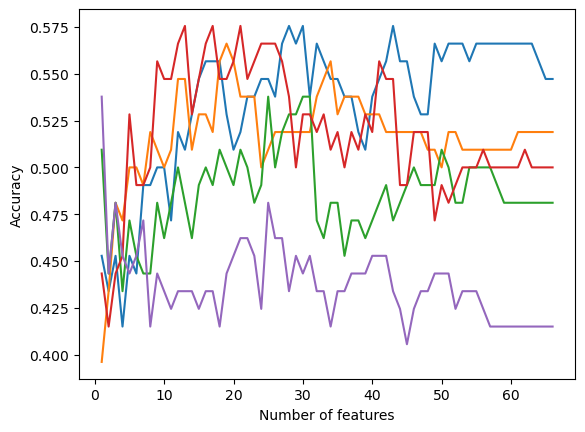

In [40]:
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.plot(range(1, len(Ind_RFE.grid_scores_) + 1), Ind_RFE.grid_scores_)
plt.show()

In [41]:
Game_Log_Model = sklin.LogisticRegression()

In [42]:
Game_Log_Model.fit(Game_Train_X, Game_Train_Y)

LogisticRegression()

In [43]:
metrics.accuracy_score(Game_Test_Y, Game_Log_Model.predict(Game_Test_X))

0.6388888888888888

In [44]:
metrics.confusion_matrix(Game_Test_Y, Game_Log_Model.predict(Game_Test_X))

array([[ 8,  5],
       [ 8, 15]], dtype=int64)

In [45]:
print(metrics.classification_report(Game_Test_Y, Game_Log_Model.predict(Game_Test_X)))

              precision    recall  f1-score   support

           0       0.50      0.62      0.55        13
           1       0.75      0.65      0.70        23

    accuracy                           0.64        36
   macro avg       0.62      0.63      0.62        36
weighted avg       0.66      0.64      0.64        36



In [46]:
Game_RFE = RFECV(Game_Log_Model, step=1, cv=5)

In [47]:
Game_RFE.fit(Game_Train_X, Game_Train_Y)

RFECV(cv=5, estimator=LogisticRegression())

In [48]:
metrics.accuracy_score(Game_Test_Y, Game_RFE.predict(Game_Test_X))

0.6388888888888888

In [49]:
metrics.confusion_matrix(Game_Test_Y, Game_RFE.predict(Game_Test_X))

array([[ 8,  5],
       [ 8, 15]], dtype=int64)

In [50]:
print(metrics.classification_report(Game_Test_Y, Game_RFE.predict(Game_Test_X)))

              precision    recall  f1-score   support

           0       0.50      0.62      0.55        13
           1       0.75      0.65      0.70        23

    accuracy                           0.64        36
   macro avg       0.62      0.63      0.62        36
weighted avg       0.66      0.64      0.64        36



In [51]:
Game_RFE.n_features_

42

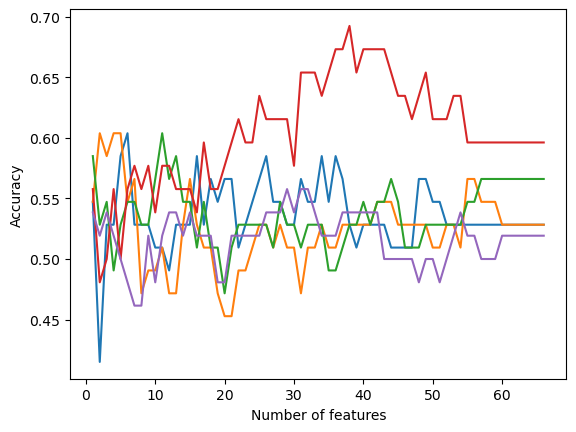

In [52]:
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.plot(range(1, len(Game_RFE.grid_scores_) + 1), Game_RFE.grid_scores_)
plt.show()